### 기울기 소실과 기울기 폭발의 원인

[1.9747254475663447, 2.1348511834630637, 2.4490390401910695, 2.5721189712230865, 2.6479088320574435, 2.6872808819374, 2.712889145501396, 2.730804182983244, 2.745400758001503, 2.758332455614646, 2.770525105658471, 2.7823798985518637, 2.794101340444549, 2.805783317725455, 2.8174719870095983, 2.829189129996216, 2.8409453703674665, 2.852745853222686, 2.864593153156488, 2.8764886032429815]


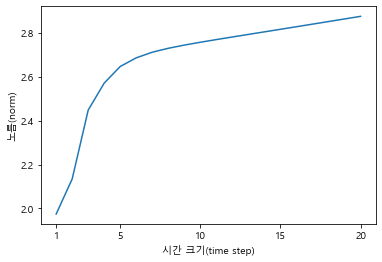

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

# Wh = np.random.randn(H, H)
Wh = np.random.randn(H, H) * 0.8

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

### 기울기 폭발 대책

before: [2.77977507 4.54622076 2.05410345 2.01378711 5.1403506  0.87229369
 4.83585532 3.62176212 7.07686622]


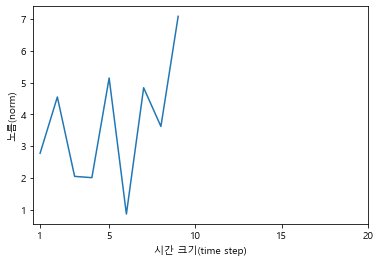

after: [0.66651711 1.09006443 0.4925201  0.4828533  1.23252117 0.20915313
 1.15951119 0.86840351 1.69684679]


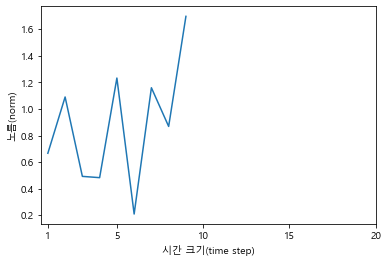

In [18]:
import numpy as np


dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
plt.plot(np.arange(len(dW1.flatten())), dW1.flatten())
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()


clip_grads(grads, max_norm)
print('after:', dW1.flatten())
# 그래프 그리기
plt.plot(np.arange(len(dW1.flatten())), dW1.flatten())
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()